In [1]:

import numpy as np
import matplotlib
import seaborn as sns
import pandas as pd
from pandas import DataFrame
#import mpl_toolkits
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import Image

In [2]:
path = r'C:\Users\Nursultan\Documents\Data Science\breast cancer\wdbc.data.csv'
df = pd.read_csv(path, names = ['ID', 'Diagnosis',
                    'MRadius', 'MTexture', 'Mper-ter', 'Marea', 'MSmooth-es',
                    'MComp-ness', 'MConcavity', 'MConcavPoints', 'MSymm-ry',
                    'MFractDimens', 'RadiusSE', 'TextureSE', 'Per-terSE',
                    'AreaSE', 'Smooth-esSE',
                    'Comp-nessSE', 'ConcavitySE', 'ConcavPointsSE', 
                    'Symm-rySE', 'FractDimensSE', 'WRadius', 'WTexture',
                    'WPer-ter', 'WArea', 'WSmooth-es',
                    'WComp-ness', 'WConcavity', 'WConcavPoints', 
                    'WSymm-ry', 'WFractDimens'])
df['Malignant'] = df.Diagnosis.map({'B':0, 'M':1})
df = df.drop('Diagnosis', 1)
df = df.drop('ID', 1)
df['Diagnosis'] = df['Malignant'].copy()
df['Diagnosis'].replace(0, 'Benign',inplace=True)
df['Diagnosis'].replace(1, 'Malignant',inplace=True)
#df.iloc[:5, 29]
df.head()

,MRadius,MTexture,Mper-ter,Marea,MSmooth-es,MComp-ness,MConcavity,MConcavPoints,MSymm-ry,MFractDimens,...,WPer-ter,WArea,WSmooth-es,WComp-ness,WConcavity,WConcavPoints,WSymm-ry,WFractDimens,Malignant,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,Malignant


# Initializing Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

# Test-Train Split

In [21]:
from sklearn.cross_validation import train_test_split
X, y = df.iloc[:, :30].values, df.iloc[:, 30].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)


# Combining transformers and estimators in a pipeline

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe_gnb = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

NameError: name 'LogisticRegression' is not defined

# Using K-fold cross-validation for out-of-sample evaluation

In [ ]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Feature Scaling 
We can see the features are measured on different scales, and would be beneficial
for almost any classifier. It's gonna be useful for my gradient decent.

 Standardizaiton

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print('Mean value after standardization:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(X_train_std[:,0].mean(), X_train_std[:,3].mean()) ,\
      'Mean Smoothness={:.2f}'.format(X_train_std[:,4].mean())) 


Mean value after standardization:
('  Mean Radius=-0.00, Mean Area=-0.00', 'Mean Smoothness=-0.00')


Min-Max Scaling

In [24]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(X_train)
X_minmax_train = minmax_scale.transform(X_train)
print('Min value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(X_minmax_train.min(), X_minmax_train[:,3].min()) ,\
      'Mean Smoothness={:.2f}'.format(X_minmax_train[:,4].min())) 
print('Max value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(X_minmax_train.max(), X_minmax_train[:,3].max()) ,\
      'Mean Smoothness={:.2f}'.format(X_minmax_train[:,4].max())) 

Min value after min-max:
('  Mean Radius=0.00, Mean Area=0.00', 'Mean Smoothness=0.00')
Max value after min-max:
('  Mean Radius=1.00, Mean Area=1.00', 'Mean Smoothness=1.00')


# Plotting of the original, standardized and min-max scaled dataset

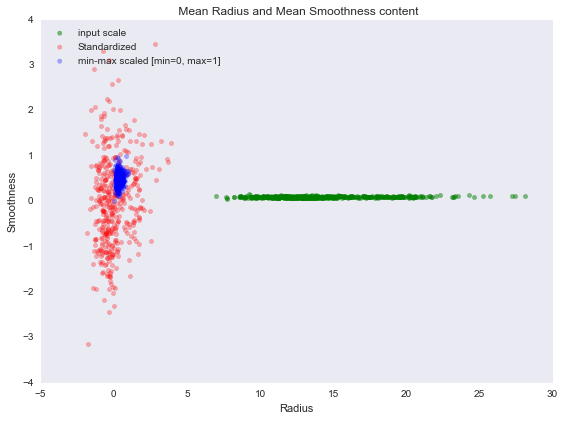

In [25]:

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df.iloc[:,0], df.iloc[:,4], 
               color = 'green', label='input scale', alpha=0.5)
    plt.scatter(X_train_std[:,0], X_train_std[:,4], color='red',
            label = 'Standardized', alpha=0.3)
    plt.scatter(X_minmax_train[:,0],X_minmax_train[:,4], color='blue', 
                label='min-max scaled [min=0, max=1]', alpha=0.3)
    plt.title(" Mean Radius and Mean Smoothness content")
    plt.xlabel('Radius')
    plt.ylabel('Smoothness')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

# Decision regions plot function

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('x', 'o', 's', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Defining a Feedforward Neural Network
            Setting input and output layer dimensonality, learning rate and regularization parameter

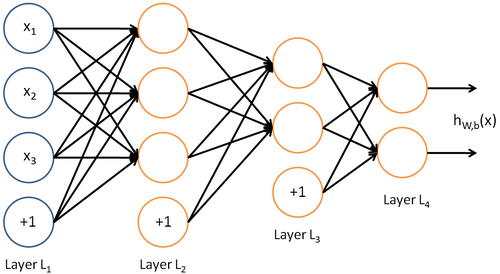

In [27]:
Image(filename='./images/500px-Network3322.png', width=400) 

In [28]:
nn_inputs = 1
nn_outputs = 2
epsilon = 0.01
reg_lambda = 0.01

In [29]:
def calc_error(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #z1 = X.dot(W1) + b1
    z1 = X_train_lda.dot(W1) + b1
    #a1= np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims = True)
    
    #calculating the error
    #correct_logprobs = - np.log(probs[range(num_samples), y])
    correct_logprobs = - np.log(probs[range(num_samples), y_train])
    error = np.sum(correct_logprobs)
    #optional regularization term
    error += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_samples * error

In [30]:
def feed_forward(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #propagate forward
    #calc the dot product of input layer and its weights and add 1st bias term
    z1 = x.dot(W1) + b1
    #apply tanh activation function
    #a1 = np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    #calc the dot product of the output of tanh func applied
    # to input layer and its weights and add 2nd bias term
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(prob, axis=1)

In [31]:
#function to learn the param-s for the NN and return the model
# hid_dim - hidden layer dimension - # of nodes in hidden layer
# num_passes - num of passes through the training set for gradient descent
# print_loss - if true, prints the loss every 1000 iterations
def build_model(hid_dim, num_passes = 5000, print_loss=False):
    #initialize param-s randomly, we need to learn them
    np.random.seed(0)
    W1 = np.random.randn(nn_inputs, hid_dim)/ np.sqrt(nn_inputs)
    b1 = np.zeros((1, hid_dim))
    W2 = np.random.randn(hid_dim,nn_outputs) / np.sqrt(hid_dim)
    b2 = np.zeros((1, nn_outputs))
    
    model = {}
    
    #Gradient descent
    for i in xrange(0, num_passes):
        
        #feed forward
        #z1 = X.dot(W1) + b1
        z1 = X_train_lda.dot(W1) + b1
        #a1 = np.tanh(z1)
        #using sigmoid activation function instead of hyperbolic tangent
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        #Backpropagate
        delta3 = probs
        # delta3[range(num_samples), y] -= 1
        delta3[range(num_samples), y_train] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        #delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        #derivative of sigmoid function f(x) = 1./ (1+ e^(-x)) is f'(x) = f(x) * (1-f(x))
        delta2 = delta3.dot(W2.T) * (a1 * (1 - a1))
        #dW1 = np.dot(X.T, delta2)
        dW1 = np.dot( X_train_lda.T, delta2)
        db1 = np.sum(delta2, axis =0)
        
        #add regularization terms (b1 and b2 aren't regularized)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #optionally print the loss
        if print_loss and i % 100 == 0:
            print "Loss after iteration %i: %f" %(i, calc_error(model))
    return model

# Applying GNB of the standardized data

In [32]:
gnb = gnb.fit(X_train_std, y_train)

y_pred = gnb.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.91228070175438591

Let's see if we can improve the accuracy with feature extraction

# Unsupervised data compression via Principal Component Analysis

In [33]:
Image(filename='./images/05_06.png', width=400) 
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  4.36893153e-01,   1.94151626e-01,   9.66154484e-02,
         6.71661075e-02,   5.49883033e-02,   4.01225718e-02,
         2.18306816e-02,   1.48922601e-02,   1.37410827e-02,
         1.10137130e-02,   1.04826288e-02,   9.16214247e-03,
         7.66306051e-03,   5.14226331e-03,   3.19635178e-03,
         2.51968451e-03,   1.92415148e-03,   1.65844223e-03,
         1.49026749e-03,   1.06777316e-03,   1.01725216e-03,
         8.48954816e-04,   7.43492725e-04,   5.81295611e-04,
         5.44222785e-04,   2.53545469e-04,   2.14385701e-04,
         4.62967124e-05,   2.51158320e-05,   3.72534805e-06])

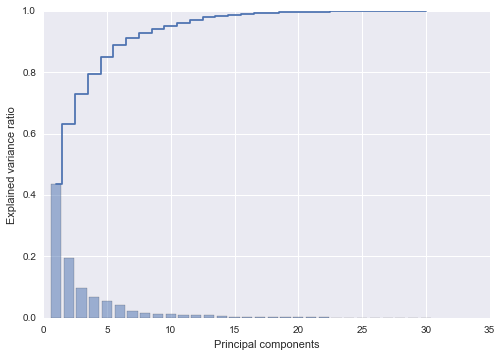

In [34]:
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 31), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')


From the graph below we see that 2 principal components explain about 63% of the variance in the data. I'm gonna take those 2 components and fit my classifier on them.

In [35]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

In [36]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'g']
markers = [ 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

NameError: name 'w' is not defined

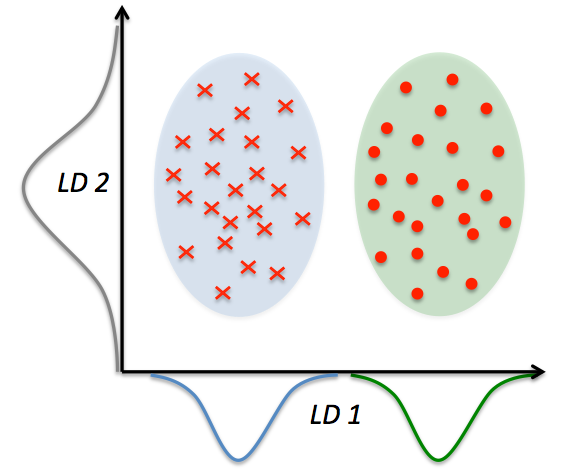

In [37]:
Image(filename='./images/05_06.png', width=400) 

# Supervised data compression via linear discriminant analysis
        
   DLA projects a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting ("curse of dimensionality") and also reduce computational costs." ( From Sebastian Raschka's article) Works  http://sebastianraschka.com/Articles/2014_python_lda.html

In [38]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)



C:\Users\Nursultan\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


# Using Gaussian Naive Bayes classifier after LDA

In [39]:
gnb = gnb.fit(X_train_lda, y_train)
X_test_lda = lda.transform(X_test_std)
y_pred = gnb.predict(X_test_lda)
accuracy_score(y_test, y_pred)

0.96491228070175439

# Using the Neural Net after applying LDA
    Loss function used is cross-entropy error, because MSE loss function doesn't really make distinction between 0.1 and 0.01 errors

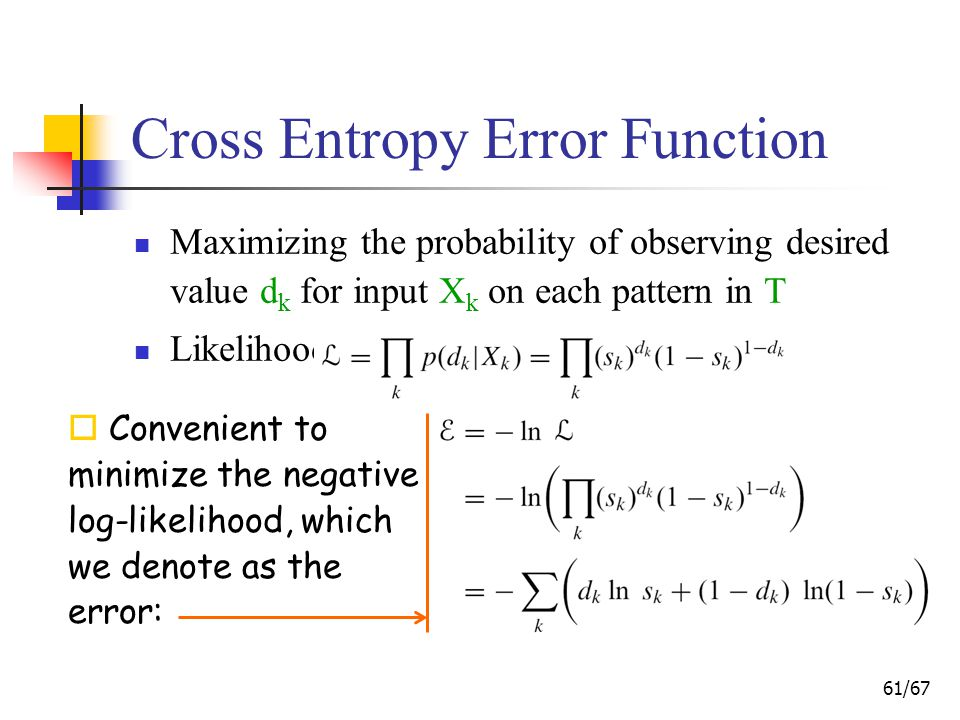

In [40]:
Image(filename='./images/slide_61.png', width=600) 

In [41]:
num_samples = len(X_train_lda)
print(num_samples)

# Build a model with a 1-dim hidden layer
model = build_model(1, print_loss=True)


398
Loss after iteration 0: 0.472278
Loss after iteration 100: 0.070998
Loss after iteration 200: 0.069488
Loss after iteration 300: 0.068682
Loss after iteration 400: 0.068230
Loss after iteration 500: 0.067962
Loss after iteration 600: 0.067791
Loss after iteration 700: 0.067676
Loss after iteration 800: 0.067595
Loss after iteration 900: 0.067535
Loss after iteration 1000: 0.067491
Loss after iteration 1100: 0.067456
Loss after iteration 1200: 0.067430
Loss after iteration 1300: 0.067409
Loss after iteration 1400: 0.067392
Loss after iteration 1500: 0.067378
Loss after iteration 1600: 0.067367
Loss after iteration 1700: 0.067357
Loss after iteration 1800: 0.067350
Loss after iteration 1900: 0.067343
Loss after iteration 2000: 0.067338
Loss after iteration 2100: 0.067333
Loss after iteration 2200: 0.067329
Loss after iteration 2300: 0.067326
Loss after iteration 2400: 0.067323
Loss after iteration 2500: 0.067321
Loss after iteration 2600: 0.067319
Loss after iteration 2700: 0.067317


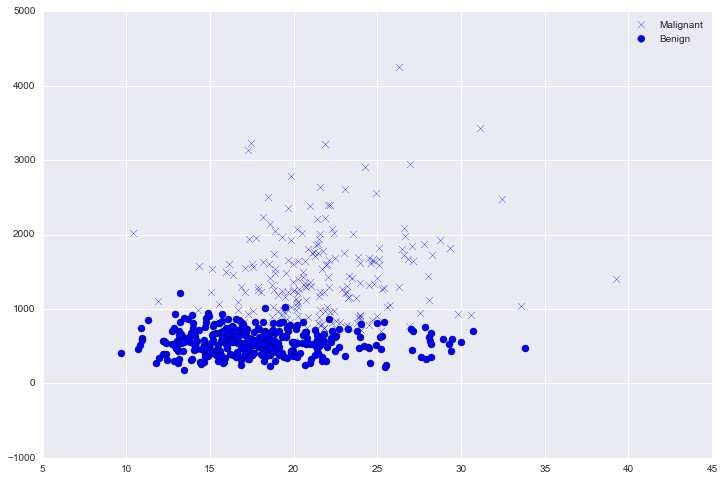

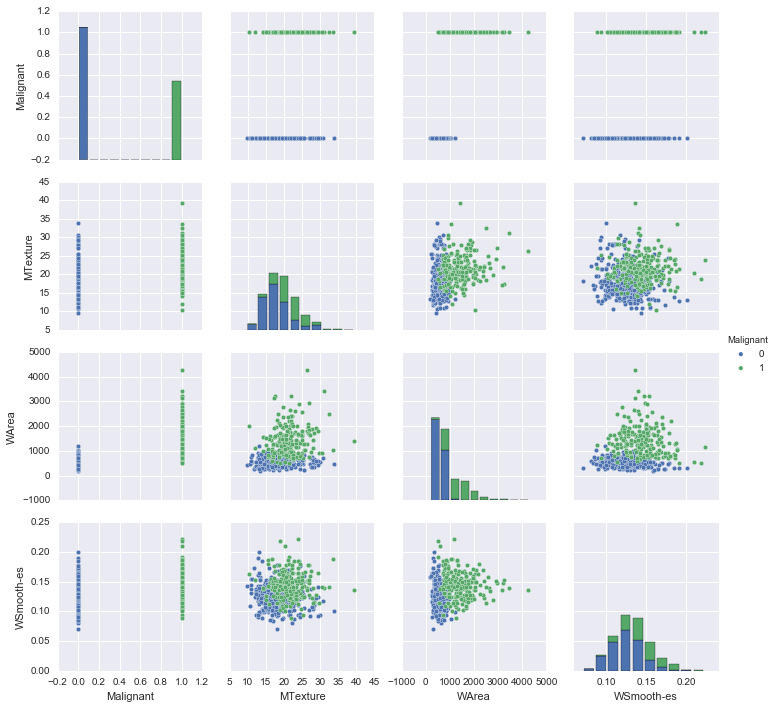

In [42]:

malignant = df[df['Malignant'].isin([1])]
benign = df[df['Malignant'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(malignant['MTexture'], malignant['WArea'], s=50, marker='x', label='Malignant')
ax.scatter(benign['MTexture'], benign['WArea'], s=50, marker='o', label='Benign')
ax.legend()

seabornMatrix = sns.pairplot(df[['Malignant','MTexture','WArea','WSmooth-es']],hue="Malignant")
seabornMatrix.savefig("SeabornMatrix.png")

In [ ]:
#df.index=range(0,569,1)
visualIn3D = plt.figure().gca(projection='3d')
fig3D = plt.gcf()
fig3D.set_size_inches(15.5, 10.5)
visualIn3D.scatter(df['MTexture'], df['WArea'], df['WSmooth-es'], c= 'b')
visualIn3D.set_xlabel('Mean Texture')
visualIn3D.set_ylabel('Worst Area')
visualIn3D.set_zlabel('Worst Smoothness')
plt.show()
fig3D.savefig('3D visualization.png', bbox_inches='tight')